# Prosocial Behavior in Rats

### Attempt to use Python to extract trial per trial data

This notebook extracts the trial per trial data contained in excel sheets
-   Read in the data
-   Compute percent choice per rat per session 
-  Plot the data

In [2]:
cd C:\Users\hernandez\Dropbox (Personal)\Recyclage\Python_LAB\datasets

C:\Users\hernandez\Dropbox (Personal)\Recyclage\Python_LAB\datasets


In [3]:
import pandas as pd
import os
import numpy as np

In [4]:
pwd

'C:\\Users\\hernandez\\Dropbox (Personal)\\Recyclage\\Python_LAB\\datasets'

In [7]:
files = os.listdir(os.curdir)

In [131]:
files

['trial_data_SBL042d.xls', 'trial_data_SBL042e.xls', 'trial_data_SBL048.xls']

In [134]:
# Import data separately
trial_data_SBL042d = pd.read_excel(files[0], header=None, index_col=None)
trial_data_SBL042e = pd.read_excel(files[1], header=None, index_col=None)
trial_data_SBL048  = pd.read_excel(files[2], header=None, index_col=None)
#print(trial_data_SBL042e)

In [ ]:
# Or loop over files present in folder
trial_data_all = pd.DataFrame()
for iFile in range(1,len(files)+1):
    curr_dat = pd.read_excel(files[iFile-1], header=None, index_col=None)
    trial_data_all = trial_data_all.append(curr_dat, ignore_index=True)
    print(trial_data_all)


In [207]:
trial_data_all.shape

(24, 80)

In [208]:
trial_data_all

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,1,2,1,2,2,1,1
1,1,2,1,2,1,2,2,2,1,2,...,1,1,1,1,1,1,1,1,1,1
2,1,1,2,2,1,2,2,2,2,1,...,2,2,2,2,2,2,2,1,2,1
3,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,2,2,0
4,2,2,2,2,1,1,2,2,2,2,...,1,2,2,2,2,1,2,1,2,2
5,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6,1,2,2,2,2,2,2,2,1,1,...,1,1,1,1,1,2,2,1,1,1
7,2,2,2,1,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
8,1,2,2,2,1,1,2,2,1,2,...,1,1,2,1,1,2,1,1,1,0
9,2,2,2,2,2,2,2,2,2,2,...,1,1,2,1,2,2,2,1,1,2


In [209]:
# function to count the values per row in a data frame, between min and max values

def count_values(series, range_min, range_max):
    
    return series.between(left= range_min, right=range_max).sum()


In [246]:
# Compute proportion of choices
proportion_choice =[]
nSess = 4
for iSess in range(1,nSess+1):
    proportion_choice.append(trial_data_all.iloc[:, (iSess - 1)*20:iSess * 20].apply(func=lambda row: 
                      count_values(row,1.5,2.1),axis =1) / (len(trial_data_all.columns)/nSess))
    

In [247]:
proportion_choice=pd.DataFrame(proportion_choice)
proportion_choice

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.00,0.60,0.60,1.00,0.80,1.00,0.65,0.90,0.6,0.85,...,0.50,0.55,1.0,0.65,0.60,0.75,1.00,0.85,0.95,0.55
1,0.85,0.20,0.65,0.95,0.70,1.00,0.15,0.65,0.0,0.40,...,0.45,0.10,0.8,0.55,0.60,0.35,0.85,0.75,1.00,0.40
2,0.85,0.05,0.45,1.00,0.80,1.00,0.35,0.80,0.0,0.35,...,0.40,0.15,0.6,0.70,0.55,0.25,0.85,0.85,1.00,0.45
3,0.65,0.00,0.75,0.90,0.45,0.95,0.20,1.00,0.3,0.30,...,0.40,0.15,0.6,0.75,0.40,0.05,0.85,0.75,1.00,0.10


In [248]:
proportion_choice.add_prefix('Rat')
#proportion_choice.columns = ['Rat1', 'Rat2',', Rat3','Rat4','Rat5','Rat6']
proportion_choice.rename(index={0: 'Baseline', 1: 'Shock1', 2: 'Shock2', 3: 'Shock3'}, inplace=True)
proportion_choice


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Baseline,1.00,0.60,0.60,1.00,0.80,1.00,0.65,0.90,0.6,0.85,...,0.50,0.55,1.0,0.65,0.60,0.75,1.00,0.85,0.95,0.55
Shock1,0.85,0.20,0.65,0.95,0.70,1.00,0.15,0.65,0.0,0.40,...,0.45,0.10,0.8,0.55,0.60,0.35,0.85,0.75,1.00,0.40
Shock2,0.85,0.05,0.45,1.00,0.80,1.00,0.35,0.80,0.0,0.35,...,0.40,0.15,0.6,0.70,0.55,0.25,0.85,0.85,1.00,0.45
Shock3,0.65,0.00,0.75,0.90,0.45,0.95,0.20,1.00,0.3,0.30,...,0.40,0.15,0.6,0.75,0.40,0.05,0.85,0.75,1.00,0.10


### Now, we are going to do some plots


In [249]:
import matplotlib.pyplot as plt
import numpy as np

In [255]:
# Lets convert the data as numpy arrays
converted_dat = np.asarray(proportion_choice)
converted_dat.shape
np.mean(converted_dat, axis=1)

array([0.7625    , 0.55416667, 0.56875   , 0.49583333])

<ErrorbarContainer object of 3 artists>

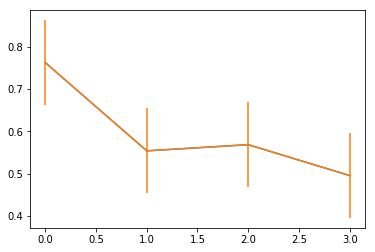

In [261]:
#plt.plot(np.mean(converted_dat, axis=1))
plt.errorbar(range(4), np.mean(converted_dat, axis=1), yerr=0.1)